## Fast Food AB Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ABFastFood.csv')

df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [2]:
print ('Rows     : ' , df.shape[0])
print ('Columns  : ' , df.shape[1])
print ('Features : ', df.columns.tolist())
print ('Missing values :  ', df.isnull().sum().values.sum())
print ('Unique values :  ', df.nunique())

Rows     :  548
Columns  :  7
Features :  ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']
Missing values :   0
Unique values :   MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [3]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


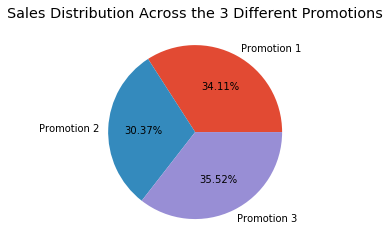

In [4]:
# Plot marketing and sales
labels=['Promotion 1', 'Promotion 2', 'Promotion 3']
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(labels=labels, autopct='%.2f%%')
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

In [5]:
# View promotions by market size
df.groupby(['Promotion', 'MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [6]:
# Rearrange the table
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


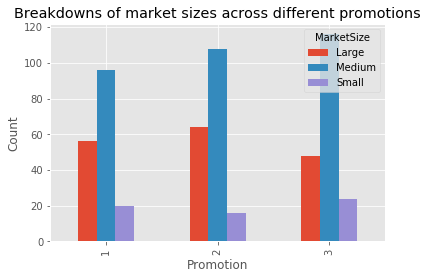

In [7]:
# Plot the table
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    grid=True)

ax.set_ylabel('Count')
ax.set_title('Breakdowns of market sizes across different promotions')

plt.show()

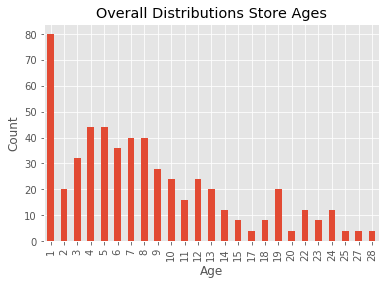

In [8]:
# Plot the age of the stores
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar',
    grid=True)

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

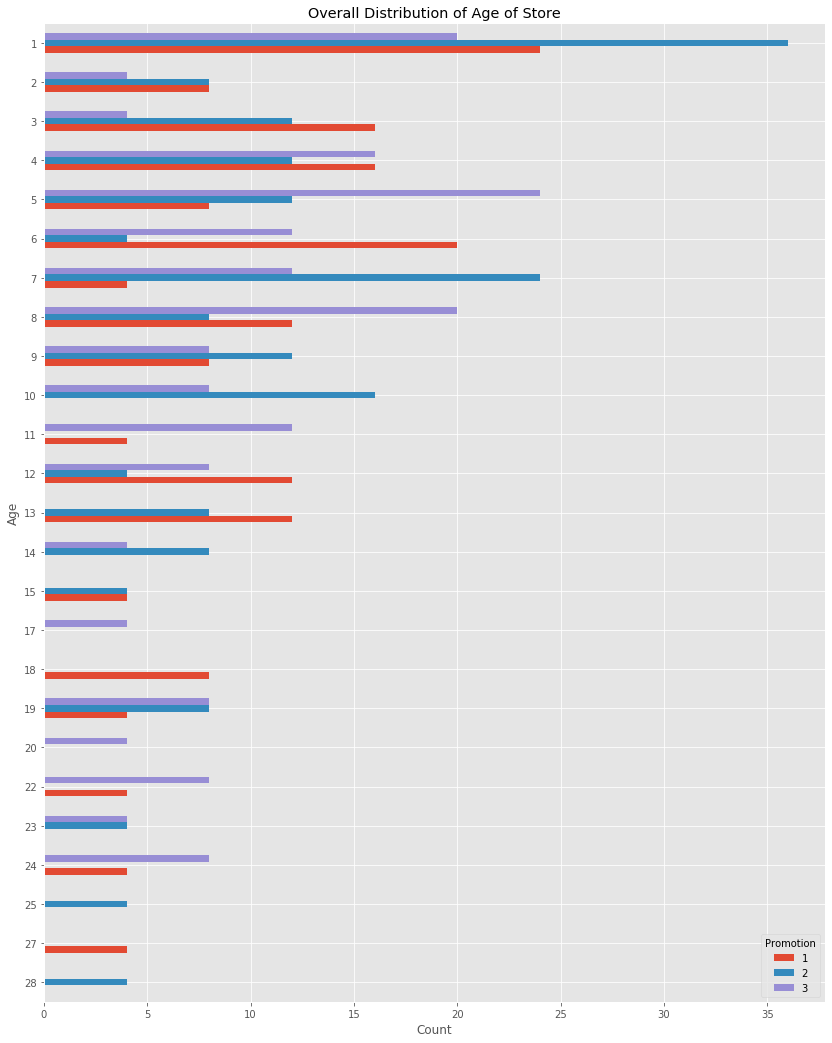

In [9]:
# Plot Age of Store and Promotion
# df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID']
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh',
    figsize=(14,18),
    grid=True)

ax.set_ylabel('Age')
ax.set_xlabel('Count')
ax.set_title('Overall Distribution of Age of Store')

plt.show()

In [10]:
# Distribution of Age of Store
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


In [11]:
# Get some stats
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
counts = df.groupby('Promotion').count()['SalesInThousands']
print(means)
print(stds)
print(counts)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


In [12]:
# Computing the t and p values 1 & 2
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


In [13]:
# 1 & 3
t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
                       df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
                       equal_var=False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = 1.5560224307758634
p-value = 0.12059147742229478


In [14]:
# 2 & 3
t, p = stats.ttest_ind(df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
                       equal_var=False)

print(f't-value = {str(t)}')
print(f'p-value = {str(p)}')

t-value = -4.88139271089348
p-value = 1.5692733176039892e-06


In [15]:
# Anova with statsmodels https://pythonfordatascience.org/anova-python/
from statsmodels.formula.api import ols

results = ols('SalesInThousands ~ C(Promotion)', data=df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       SalesInThousands   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     21.95
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           6.77e-10
Time:                        16:39:31   Log-Likelihood:                -2300.5
No. Observations:                 548   AIC:                             4607.
Df Residuals:                     545   BIC:                             4620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            58.0990      1.231     47.186      0.000      55.680      60.518
C(Promotion)[T.2]   -10.7696      1.704     -6.321      0.000     -14.116      -7.423
C(Promotion)[T.3]    -2.7345      1.704     -1.605      0.109      -6.081       0.612
==============================================================================
Omnibus:                       52.072   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.242
Skew:                           0.842   Prob(JB):                     6.81e-15
Kurtosis:                       3.137   Cond. No.                         3.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Anova table
import statsmodels.api as sm

aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Promotion),11449.174291,2.0,21.953486,6.765849e-10
Residual,142114.105414,545.0,NaN,NaN


In [17]:
# R-square and Eta-square are measuring two different things. 
# R-square measures the contribution of the entire model in explaining the study variation. 
# Eta-square and Omega-square measure the contribution of the individual model terms. 

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Promotion),11449.174291,2.0,5724.587145,21.953486,6.765849e-10,0.074557,0.07104
Residual,142114.105414,545.0,260.759826,NaN,NaN,NaN,NaN


In [18]:
# Check assumptions
results.diagn

{'jb': 65.24203806417077,
 'jbpv': 6.805678674182733e-15,
 'skew': 0.8423930944707604,
 'kurtosis': 3.137153320080194,
 'omni': 52.07170071330315,
 'omnipv': 4.929170701884168e-12,
 'condno': 3.8319709800497956,
 'mineigval': 46.92679962351268}

In [19]:
# Levene’s test for equal variances between groups
stats.levene(df['SalesInThousands'][df['Promotion'] == 1],
             df['SalesInThousands'][df['Promotion'] == 2],
             df['SalesInThousands'][df['Promotion'] == 3])

LeveneResult(statistic=1.2696787527507418, pvalue=0.2817514565692118)

In [20]:
# Shapiro for normality
stats.shapiro(results.resid)

(0.922081708908081, 3.154390400244417e-16)

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['SalesInThousands'], df['Promotion'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2 -10.7696  0.001 -14.774 -6.7652   True
     1      3  -2.7345 0.2447 -6.7389  1.2698  False
     2      3   8.0351  0.001  4.1207 11.9494   True
----------------------------------------------------


In [22]:
# Independent tests when eq variance is true
stats.ttest_ind(df['SalesInThousands'][df['Promotion'] == 1], df['SalesInThousands'][df['Promotion'] == 2])

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)

In [23]:
# Compared to earlier test when eq var is false
stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False) # Values different when false, same when true

Ttest_indResult(statistic=6.42752867090748, pvalue=4.2903687179871785e-10)

In [24]:
stats.ttest_ind(df['SalesInThousands'][df['Promotion'] == 1], df['SalesInThousands'][df['Promotion'] == 3])

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313273)

In [25]:
stats.ttest_ind(df['SalesInThousands'][df['Promotion'] == 2], df['SalesInThousands'][df['Promotion'] == 3])

Ttest_indResult(statistic=-4.88139271089348, pvalue=1.562894303627738e-06)